In [55]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [56]:
df_part7 = pd.read_csv('../data/유의성/df_sig_data.csv', encoding='CP949')
df_part7

,회사명,거래소코드,회계년도,상장일,상장폐지일_x,부실기업1,부실기업2,부실기업,업종,총자본증가율,순이익증가율,자기자본증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,부채비율,CASH FLOW 대 부채비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,총자본투자효율,설비투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,유동자산회전률,당좌자산회전률,재고자산회전률,자기자본구성비율,총자본회전률,타인자본회전률,순운전자본회전률
0,(주)CMG제약,58820,201112,200108,NaN,0,0,0,제조업,13.166482,80.280163,5.219839,4.65,1263.950784,3.61,-8.50,-5.58,2.37,3.51,-8.28,0.80,108.35,-245.87,406.280703,-34.519834,-58.600377,418.623493,-17.45,51.41,-46.08,-15.65,-24.07,12.72,35.86,19.56,89.819047,27.179630,1.25,1.55,6.42,66.046945,0.66,2.01,0.86
1,(주)CMG제약,58820,201212,200108,NaN,0,0,0,제조업,109.147119,-341.571868,75.170505,-0.74,-756.819406,-25.87,-40.97,-15.78,-9.96,-16.95,-26.84,2.53,140.55,-165.71,246.198501,-100.872314,-23.817768,478.648111,-4.31,80.77,-8.10,-3.62,-12.71,0.47,2.89,1.66,1749.845902,-0.657015,0.52,0.57,5.71,55.317408,0.39,0.93,0.42
2,(주)CMG제약,58820,201312,200108,NaN,0,0,0,제조업,-2.093352,2348.675303,55.100407,1.49,631.501169,3.88,1.45,0.52,1.40,1.96,0.74,1.65,98.55,-106.33,235.517466,3.419043,-45.471032,566.198482,13.12,14.11,-39.85,-4.93,-13.51,12.51,77.91,34.29,71.284323,51.118235,0.48,0.52,5.39,87.631971,0.36,1.26,0.42
3,(주)CMG제약,58820,201412,200108,NaN,0,0,0,제조업,3.855597,-46.641074,0.010946,20.59,-44.098325,1.94,0.69,0.28,0.78,0.90,0.32,-0.65,99.32,-106.65,262.650435,1.824365,8.367993,566.417813,13.13,18.50,-17.73,-2.77,-7.06,12.16,37.80,31.04,76.809811,43.079512,0.68,0.80,4.77,84.387905,0.40,2.85,0.56
4,(주)CMG제약,58820,201512,200108,NaN,0,0,0,제조업,-2.644307,-2409.614083,-4.480893,-4.88,-681.514824,-9.51,-13.50,-6.37,-4.49,-5.37,-7.62,-0.11,113.24,-120.22,306.259774,-41.338674,27.296492,530.854621,6.02,20.78,16.12,2.77,5.80,7.63,24.21,15.96,134.474407,27.671795,0.99,1.22,5.22,82.795953,0.47,2.88,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12738,흥아해운(주),3280,201312,197606,NaN,0,0,0,운수 및 창고업,7.026008,17.748954,24.611435,-3.78,-41.383093,2.51,2.36,3.29,3.50,13.80,12.97,1.84,95.90,18.35,9088.600308,214.300424,317.421335,1664.376003,273.07,267.60,6.48,4.71,3.50,14.13,36.63,10.48,37.002209,103.399418,5.18,5.70,56.65,27.203257,1.39,1.87,2.02
12739,흥아해운(주),3280,201412,197606,NaN,0,0,0,운수 및 창고업,13.690307,1.063296,7.760601,9.90,-3.906495,2.25,2.22,3.01,3.04,11.51,11.37,1.66,97.18,16.84,9740.426978,216.579071,5.153858,1817.138085,301.53,287.83,2.84,2.10,1.66,13.89,27.88,10.93,48.001879,102.744066,4.98,5.44,59.77,25.784426,1.35,1.84,2.03
12740,흥아해운(주),3280,201512,197606,NaN,0,0,0,운수 및 창고업,21.933460,-42.676587,3.389326,7.68,14.408829,2.51,1.24,1.46,2.95,12.48,6.18,2.22,98.11,11.64,9976.167403,124.150515,400.330868,1910.263815,314.93,357.39,2.78,2.17,2.03,13.11,21.49,12.28,50.647901,108.702706,5.83,6.38,68.48,21.863026,1.17,1.54,2.15
12741,흥아해운(주),3280,201612,197606,NaN,0,0,0,운수 및 창고업,21.081715,-263.287062,11.215038,15.87,-72.247242,0.71,-2.06,-1.96,0.67,3.23,-9.40,3.21,100.55,6.97,6512.596843,-134.467088,-10.880790,1439.386602,205.62,397.97,2.12,1.70,1.96,10.98,15.81,12.66,66.490562,86.464501,6.98,7.96,56.47,20.081457,0.95,1.20,2.19


In [57]:
df_part7.isna().sum()

회사명                      0
거래소코드                    0
회계년도                     0
상장일                      0
상장폐지일_x              12288
부실기업1                    0
부실기업2                    0
부실기업                     0
업종                       0
총자본증가율                   0
순이익증가율                   0
자기자본증가율                  0
종업원수증가율                  0
정상영업손익증가율                0
매출액정상영업이익률               0
매출액순이익률                  0
총자본순이익률                  0
총자본정상영업이익률               0
자기자본정상영업이익률              0
자기자본순이익률                 0
금융비용부담률                  0
수지비율                     0
사내유보 대 자기자본비율            0
1주당매출액                   0
1주당순이익                   0
1주당 CASH FLOW            0
1주당순자산                   0
유보율                      0
부채비율                     0
CASH FLOW 대 부채비율         0
CASH FLOW 대 총자본비율        0
CASH FLOW 대 매출액비율        0
총자본투자효율                  0
설비투자효율                   0
부가가치율                    0
노동소득분배율                  0
종업원1인당부가가치율_계산           0
유

In [58]:
df_part7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743 entries, 0 to 12742
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                12743 non-null  object 
 1   거래소코드              12743 non-null  int64  
 2   회계년도               12743 non-null  int64  
 3   상장일                12743 non-null  int64  
 4   상장폐지일_x            455 non-null    float64
 5   부실기업1              12743 non-null  int64  
 6   부실기업2              12743 non-null  int64  
 7   부실기업               12743 non-null  int64  
 8   업종                 12743 non-null  object 
 9   총자본증가율             12743 non-null  float64
 10  순이익증가율             12743 non-null  float64
 11  자기자본증가율            12743 non-null  float64
 12  종업원수증가율            12743 non-null  float64
 13  정상영업손익증가율          12743 non-null  float64
 14  매출액정상영업이익률         12743 non-null  float64
 15  매출액순이익률            12743 non-null  float64
 16  총자본순이익률            127

### 독립변수 및 종속변수 컬럼 지정

In [59]:
data = df_part7.iloc[:, 10:]
target = df_part7.iloc[:, 7]

In [60]:
data

,순이익증가율,자기자본증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,부채비율,CASH FLOW 대 부채비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,총자본투자효율,설비투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,유동자산회전률,당좌자산회전률,재고자산회전률,자기자본구성비율,총자본회전률,타인자본회전률,순운전자본회전률
0,80.280163,5.219839,4.65,1263.950784,3.61,-8.50,-5.58,2.37,3.51,-8.28,0.80,108.35,-245.87,406.280703,-34.519834,-58.600377,418.623493,-17.45,51.41,-46.08,-15.65,-24.07,12.72,35.86,19.56,89.819047,27.179630,1.25,1.55,6.42,66.046945,0.66,2.01,0.86
1,-341.571868,75.170505,-0.74,-756.819406,-25.87,-40.97,-15.78,-9.96,-16.95,-26.84,2.53,140.55,-165.71,246.198501,-100.872314,-23.817768,478.648111,-4.31,80.77,-8.10,-3.62,-12.71,0.47,2.89,1.66,1749.845902,-0.657015,0.52,0.57,5.71,55.317408,0.39,0.93,0.42
2,2348.675303,55.100407,1.49,631.501169,3.88,1.45,0.52,1.40,1.96,0.74,1.65,98.55,-106.33,235.517466,3.419043,-45.471032,566.198482,13.12,14.11,-39.85,-4.93,-13.51,12.51,77.91,34.29,71.284323,51.118235,0.48,0.52,5.39,87.631971,0.36,1.26,0.42
3,-46.641074,0.010946,20.59,-44.098325,1.94,0.69,0.28,0.78,0.90,0.32,-0.65,99.32,-106.65,262.650435,1.824365,8.367993,566.417813,13.13,18.50,-17.73,-2.77,-7.06,12.16,37.80,31.04,76.809811,43.079512,0.68,0.80,4.77,84.387905,0.40,2.85,0.56
4,-2409.614083,-4.480893,-4.88,-681.514824,-9.51,-13.50,-6.37,-4.49,-5.37,-7.62,-0.11,113.24,-120.22,306.259774,-41.338674,27.296492,530.854621,6.02,20.78,16.12,2.77,5.80,7.63,24.21,15.96,134.474407,27.671795,0.99,1.22,5.22,82.795953,0.47,2.88,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12738,17.748954,24.611435,-3.78,-41.383093,2.51,2.36,3.29,3.50,13.80,12.97,1.84,95.90,18.35,9088.600308,214.300424,317.421335,1664.376003,273.07,267.60,6.48,4.71,3.50,14.13,36.63,10.48,37.002209,103.399418,5.18,5.70,56.65,27.203257,1.39,1.87,2.02
12739,1.063296,7.760601,9.90,-3.906495,2.25,2.22,3.01,3.04,11.51,11.37,1.66,97.18,16.84,9740.426978,216.579071,5.153858,1817.138085,301.53,287.83,2.84,2.10,1.66,13.89,27.88,10.93,48.001879,102.744066,4.98,5.44,59.77,25.784426,1.35,1.84,2.03
12740,-42.676587,3.389326,7.68,14.408829,2.51,1.24,1.46,2.95,12.48,6.18,2.22,98.11,11.64,9976.167403,124.150515,400.330868,1910.263815,314.93,357.39,2.78,2.17,2.03,13.11,21.49,12.28,50.647901,108.702706,5.83,6.38,68.48,21.863026,1.17,1.54,2.15
12741,-263.287062,11.215038,15.87,-72.247242,0.71,-2.06,-1.96,0.67,3.23,-9.40,3.21,100.55,6.97,6512.596843,-134.467088,-10.880790,1439.386602,205.62,397.97,2.12,1.70,1.96,10.98,15.81,12.66,66.490562,86.464501,6.98,7.96,56.47,20.081457,0.95,1.20,2.19


In [61]:
target

0        0
1        0
2        0
3        0
4        0
        ..
12738    0
12739    0
12740    0
12741    0
12742    1
Name: 부실기업, Length: 12743, dtype: int64

### 독립변수 및 종속변수 컬럼 지정

In [62]:
data = df_part7.iloc[:, 10:]
target = df_part7.iloc[:, 7]

In [63]:
data

,순이익증가율,자기자본증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,부채비율,CASH FLOW 대 부채비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,총자본투자효율,설비투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,유동자산회전률,당좌자산회전률,재고자산회전률,자기자본구성비율,총자본회전률,타인자본회전률,순운전자본회전률
0,80.280163,5.219839,4.65,1263.950784,3.61,-8.50,-5.58,2.37,3.51,-8.28,0.80,108.35,-245.87,406.280703,-34.519834,-58.600377,418.623493,-17.45,51.41,-46.08,-15.65,-24.07,12.72,35.86,19.56,89.819047,27.179630,1.25,1.55,6.42,66.046945,0.66,2.01,0.86
1,-341.571868,75.170505,-0.74,-756.819406,-25.87,-40.97,-15.78,-9.96,-16.95,-26.84,2.53,140.55,-165.71,246.198501,-100.872314,-23.817768,478.648111,-4.31,80.77,-8.10,-3.62,-12.71,0.47,2.89,1.66,1749.845902,-0.657015,0.52,0.57,5.71,55.317408,0.39,0.93,0.42
2,2348.675303,55.100407,1.49,631.501169,3.88,1.45,0.52,1.40,1.96,0.74,1.65,98.55,-106.33,235.517466,3.419043,-45.471032,566.198482,13.12,14.11,-39.85,-4.93,-13.51,12.51,77.91,34.29,71.284323,51.118235,0.48,0.52,5.39,87.631971,0.36,1.26,0.42
3,-46.641074,0.010946,20.59,-44.098325,1.94,0.69,0.28,0.78,0.90,0.32,-0.65,99.32,-106.65,262.650435,1.824365,8.367993,566.417813,13.13,18.50,-17.73,-2.77,-7.06,12.16,37.80,31.04,76.809811,43.079512,0.68,0.80,4.77,84.387905,0.40,2.85,0.56
4,-2409.614083,-4.480893,-4.88,-681.514824,-9.51,-13.50,-6.37,-4.49,-5.37,-7.62,-0.11,113.24,-120.22,306.259774,-41.338674,27.296492,530.854621,6.02,20.78,16.12,2.77,5.80,7.63,24.21,15.96,134.474407,27.671795,0.99,1.22,5.22,82.795953,0.47,2.88,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12738,17.748954,24.611435,-3.78,-41.383093,2.51,2.36,3.29,3.50,13.80,12.97,1.84,95.90,18.35,9088.600308,214.300424,317.421335,1664.376003,273.07,267.60,6.48,4.71,3.50,14.13,36.63,10.48,37.002209,103.399418,5.18,5.70,56.65,27.203257,1.39,1.87,2.02
12739,1.063296,7.760601,9.90,-3.906495,2.25,2.22,3.01,3.04,11.51,11.37,1.66,97.18,16.84,9740.426978,216.579071,5.153858,1817.138085,301.53,287.83,2.84,2.10,1.66,13.89,27.88,10.93,48.001879,102.744066,4.98,5.44,59.77,25.784426,1.35,1.84,2.03
12740,-42.676587,3.389326,7.68,14.408829,2.51,1.24,1.46,2.95,12.48,6.18,2.22,98.11,11.64,9976.167403,124.150515,400.330868,1910.263815,314.93,357.39,2.78,2.17,2.03,13.11,21.49,12.28,50.647901,108.702706,5.83,6.38,68.48,21.863026,1.17,1.54,2.15
12741,-263.287062,11.215038,15.87,-72.247242,0.71,-2.06,-1.96,0.67,3.23,-9.40,3.21,100.55,6.97,6512.596843,-134.467088,-10.880790,1439.386602,205.62,397.97,2.12,1.70,1.96,10.98,15.81,12.66,66.490562,86.464501,6.98,7.96,56.47,20.081457,0.95,1.20,2.19


In [64]:
target

0        0
1        0
2        0
3        0
4        0
        ..
12738    0
12739    0
12740    0
12741    0
12742    1
Name: 부실기업, Length: 12743, dtype: int64

## 데이터 랜덤 분할

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
           순이익증가율    자기자본증가율  종업원수증가율   정상영업손익증가율  매출액정상영업이익률  매출액순이익률  \
4015     5.039206   6.811283    -4.28    4.618819        5.36     2.55   
10105   91.501214  22.262753   -14.29  813.211368        4.96    -4.42   
7132    -2.841982   2.478580     1.93  -58.736378        1.31     0.54   
8291   212.025805   8.368854    -4.85   -2.401740        6.67     5.51   
5389  -156.267582 -15.550104     9.29 -154.734179       -9.87   -10.18   
...           ...        ...      ...         ...         ...      ...   
8134    -2.686409   4.142518    -5.08    1.232778        3.30     6.23   
4989  -758.128176 -16.262905   -14.75 -948.921082      -19.10   -18.77   
6962   108.035493  -2.754842    -6.70  102.598691        6.88     2.67   
2448    -0.671766   0.708083    -1.37   -1.114030        2.71     1.53   
474    -12.163401  14.530926    10.81  -22.826185       19.03    15.25   

       총자본순이익률  총자본정상영업이익률  자기자본정상영업이익률  자기자본순이익률  금융비용부담률    수지비율  \
4015      3.29        6.92   

In [66]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(8920, 34), 테스트 세트 Shape:(3823, 34)
 학습 세트 레이블 값 분포 비율
0    0.941368
1    0.058632
Name: 부실기업, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.402354
1    0.026233
Name: 부실기업, dtype: float64


## 상관관계 히트맵

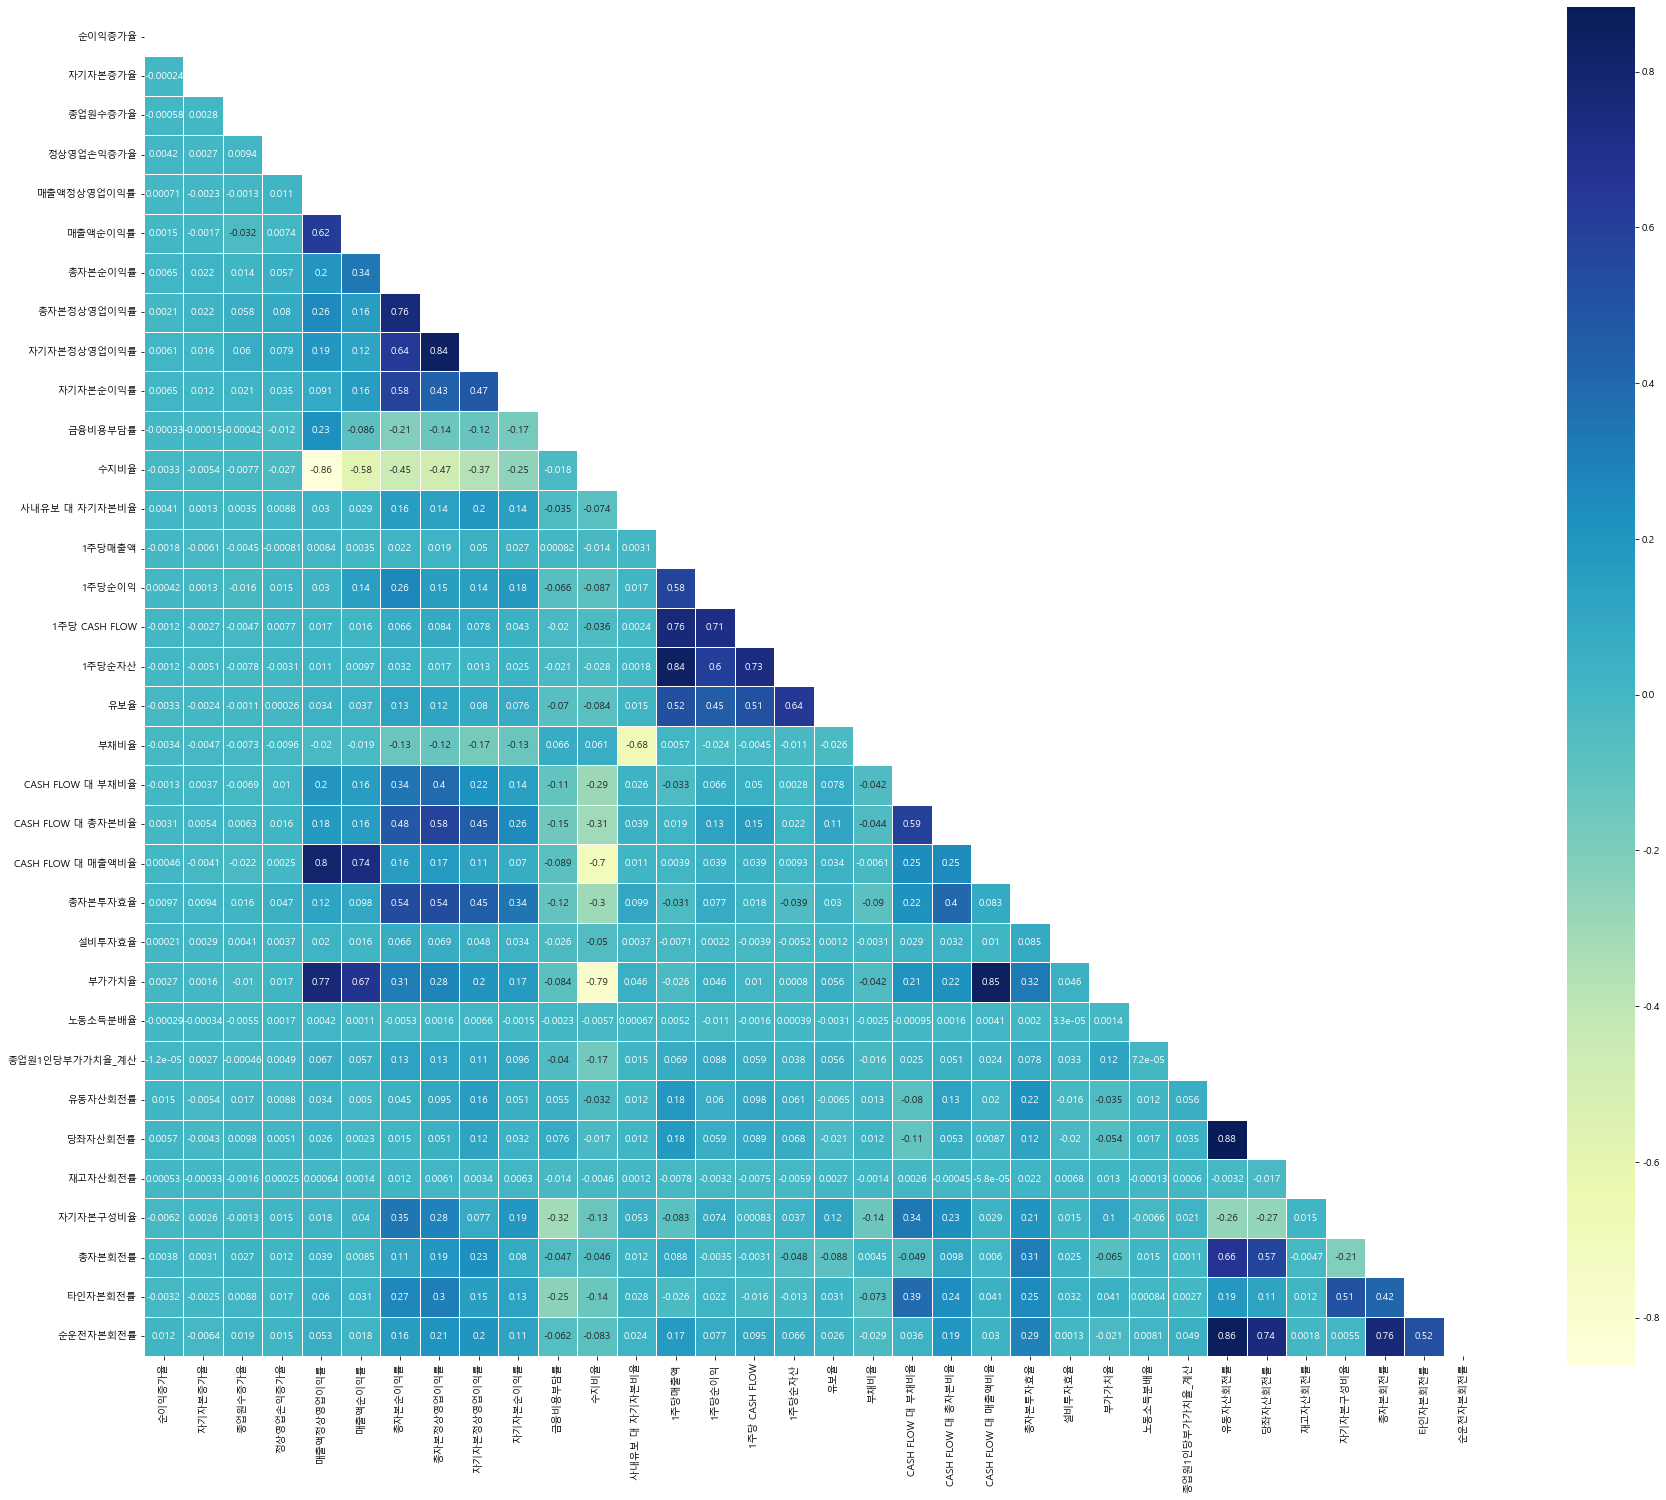

In [67]:
# 상관계수 히트맵

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(30,25))

df_corr = df_part7.iloc[:, 10:].corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, annot=True, mask=mask, linewidths=.5, cmap="YlGnBu", square=True)

plt.show()

In [17]:
df_corr

,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,자기자본구성비율,유동비율,당좌비율,현금비율,매출채권 대 매입채무비율,부채비율,이자보상배율,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,재고자산대순운전자본비율,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,노동장비율_계산,기계장비율_계산,자본집약도_계산,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률
총자본증가율,1.000000,-0.003346,0.124561,0.456933,0.054377,0.019997,-0.015799,-0.024033,0.149831,0.185393,0.148695,0.080395,-0.018502,-4.080230e-02,0.022232,-0.014708,-0.003048,-0.004593,-0.022866,0.026129,-0.003336,0.028804,0.035058,0.028711,-0.000845,-0.007290,0.003120,0.024153,-0.002386,0.007966,-0.037497,6.234205e-03,0.056551,0.020231,0.000651,0.021475,-0.006406,0.032046,-0.018446,-0.033239,0.001606,0.003048,-0.016232,0.009166,-0.015925,-0.033133,0.000385,-0.002003,-0.013292
순이익증가율,-0.003346,1.000000,-0.000244,0.000687,-0.000576,0.004245,0.000714,0.001498,0.006465,0.002135,0.006117,0.006477,-0.000335,-3.280839e-03,0.004119,-0.001803,0.000417,-0.001237,-0.001152,-0.003333,-0.006150,-0.002428,-0.001671,-0.001992,-0.000176,-0.003358,-0.000198,-0.001318,0.000246,0.003091,0.000462,-2.250867e-05,0.009736,0.000214,-0.000301,0.002737,-0.000288,-0.000012,-0.001664,-0.000199,-0.001450,0.003751,-0.001111,-0.003165,0.014566,0.005687,0.000530,-0.000119,0.012334
자기자본증가율,0.124561,-0.000244,1.000000,0.017877,0.002841,0.002700,-0.002305,-0.001687,0.021880,0.022161,0.016420,0.011595,-0.000145,-5.378819e-03,0.001315,-0.006132,0.001286,-0.002742,-0.005061,-0.002436,0.002588,0.004000,0.004594,0.004161,-0.000282,-0.004654,0.000132,0.003726,-0.000241,0.005426,-0.004149,9.646169e-04,0.009373,0.002873,-0.000795,0.001583,-0.000341,0.002744,-0.007503,-0.005530,-0.003377,0.003082,-0.001234,-0.002450,-0.005443,-0.004349,-0.000333,-0.000159,-0.006425
매출액증가율,0.456933,0.000687,0.017877,1.000000,0.009081,0.032808,0.003370,-0.004182,0.018219,0.036562,0.020868,-0.006145,0.007962,-6.849812e-03,0.001317,0.009306,-0.014841,0.004250,-0.005844,-0.002507,-0.024237,-0.009515,-0.007783,-0.006166,0.000540,0.012029,-0.000514,-0.006384,-0.000845,-0.003744,-0.006404,-1.911633e-03,0.008293,0.007434,-0.000076,-0.002982,-0.002187,0.024107,0.039485,-0.010393,0.041757,0.038647,-0.004462,0.009156,0.047644,0.032635,0.003317,-0.000546,0.032245
종업원수증가율,0.054377,-0.000576,0.002841,0.009081,1.000000,0.009440,-0.001274,-0.031969,0.013558,0.057677,0.060395,0.020655,-0.000417,-7.733419e-03,0.003533,-0.004481,-0.016329,-0.004699,-0.007810,-0.001126,-0.001257,-0.002239,-0.000426,-0.000090,0.004968,-0.007297,-0.002870,-0.006918,-0.001852,0.006299,-0.022001,-3.728801e-04,0.015921,0.004141,0.008320,-0.010063,-0.005462,-0.000464,-0.020146,-0.012261,-0.013355,0.027495,-0.001611,0.008837,0.017075,0.009826,-0.001638,0.003193,0.018768
정상영업손익증가율,0.019997,0.004245,0.002700,0.032808,0.009440,1.000000,0.011410,0.007409,0.057267,0.079518,0.079402,0.035032,-0.011771,-2.729914e-02,0.008819,-0.000814,0.014948,0.007732,-0.003065,0.000261,0.015469,0.003637,0.003282,0.001473,0.000532,-0.009577,0.000134,0.009995,0.000458,0.016070,0.002458,-1.228231e-03,0.046526,0.003710,0.001379,0.016513,0.001731,0.004851,-0.003870,-0.005958,-0.003116,0.011786,-0.003468,0.017231,0.008768,0.005134,0.000246,0.000145,0.015216
매출액정상영업이익률,-0.015799,0.000714,-0.002305,0.003370,-0.001274,0.011410,1.000000,0.619623,0.196992,0.257261,0.189293,0.091349,0.227010,-8.621680e-01,0.029543,0.008388,0.029863,0.017076,0.011335,0.033755,0.017983,-0.037634,-0.042587,-0.026861,0.002290,-0.020260,0.003843,0.195639,0.003501,0.178787,0.802021,-2.204569e-04,0.124924,0.020363,0.002450,0.769040,0.004156,0.067052,0.003353,0.008047,-0.001160,0.038835,-0.000497,0.059802,0.033980,0.026215,0.000636,0.000141,0.052795
매출액순이익률,-0.024033,0.001498,-0.001687,-0.004182,-0.031969,0.007409,0.619623,1.000000,0.336024,0.162489,0.122058,0.161855,-0.085622,-5.766697e-01,0.028619,0.003548,0.144014,0.015525,0.009679,0.037455,0.03986

## 통합데이터 피처셀렉션

### Lasso

In [68]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import time
import warnings
warnings.simplefilter('ignore')

### Lasso GridSearchCV

In [69]:
lasso_model = Lasso()

param_grid = {'alpha' : [0.001, 0.01, 0.1, 1, 2, 5, 10]}

grid_time = time.time()
grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)
print('GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-grid_time))

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

GridSearchCV 수행 시간: 2.2 초


,params,mean_train_score,mean_test_score,rank_test_score
2,{'alpha': 0.1},0.116198,0.081324,1
1,{'alpha': 0.01},0.127397,0.076532,2
0,{'alpha': 0.001},0.129248,0.074374,3
4,{'alpha': 2},0.034667,0.021102,4
5,{'alpha': 5},0.026992,0.016645,5
3,{'alpha': 1},0.054078,0.011509,6
6,{'alpha': 10},0.014767,0.008294,7


In [70]:
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'alpha': 0.1}
GridSearchCV 최고 정확도:0.0813


In [71]:
# grid_search.best_params_의 alpha 값
for value in grid_search.best_params_:
    bp_value = grid_search.best_params_[value]
    print(bp_value)

0.1


In [72]:
alpha = bp_value
lasso_time = time.time()
lasso_best = Lasso(alpha=alpha).fit(X_train, y_train)
print('Lasso 수행 시간: {0:.1f} 초'.format(time.time()-lasso_time))
print('alpha가 ', alpha, '일 때 피처 개수 : {}'.format(np.sum(lasso_best.coef_ != 0)))

Lasso 수행 시간: 0.0 초
alpha가  0.1 일 때 피처 개수 : 23


In [73]:
df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train.columns
df_lasso['coef'] = lasso_best.coef_
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
# df_lasso.sort_values('coef', ascending=False).reset_index(drop=True)
df_lasso

,feature,coef
0,순이익증가율,2.359189e-07
1,자기자본증가율,1.567318e-05
2,종업원수증가율,-4.755908e-05
3,정상영업손익증가율,-5.604813e-06
4,매출액정상영업이익률,4.747323e-05
5,매출액순이익률,1.783560e-06
6,총자본순이익률,-8.388047e-05
8,자기자본정상영업이익률,-2.904004e-03
9,자기자본순이익률,-5.309832e-04
11,수지비율,8.151833e-05


In [74]:
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')

Lasso에서 선택된 피처 수 23 개


In [75]:
# 라쏘에서 선택된 피처
lasso_features = df_lasso['feature'].values.tolist()
lasso_features

['순이익증가율',
 '자기자본증가율',
 '종업원수증가율',
 '정상영업손익증가율',
 '매출액정상영업이익률',
 '매출액순이익률',
 '총자본순이익률',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '수지비율',
 '사내유보 대 자기자본비율',
 '1주당매출액',
 '1주당순이익',
 '1주당 CASH FLOW',
 '1주당순자산',
 '유보율',
 '부채비율',
 'CASH FLOW 대 부채비율',
 '총자본투자효율',
 '설비투자효율',
 '종업원1인당부가가치율_계산',
 '재고자산회전률',
 '자기자본구성비율']

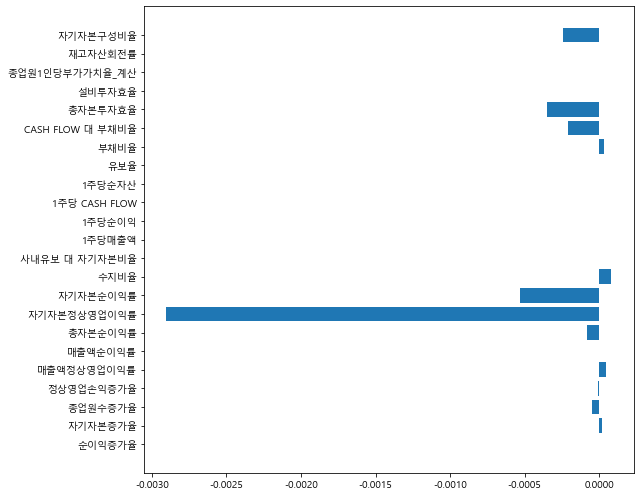

In [76]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.barh(np.arange(len(df_lasso)), df_lasso['coef'])
idx = np.arange(len(df_lasso))
ax.set_yticks(idx)
ax.set_yticklabels(df_lasso['feature'])
fig.tight_layout()
plt.show()

## RFE(Recursive Feature Elimination, Wrapper method) 
#### 모든 변수들로부터 원하는 개수의 변수들이 남을 때까지 학습을 반복하며 유의미하지 않은 변수를 하나하나 제거해나가는 Backward 방식. AIC 값. 전진선택법, 스텝와이즈

In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_time = time.time()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe.fit(X_train, y_train)
print('RFE 수행시간: {0:.1f}초'.format(time.time()-rfe_time))

rfe_scores = pd.DataFrame()
rfe_scores['Feature'] = X_train.columns
rfe_scores['Support'] = rfe.get_support()

rfe_scores

RFE 수행시간: 7.8초


,Feature,Support
0,순이익증가율,False
1,자기자본증가율,False
2,종업원수증가율,True
3,정상영업손익증가율,False
4,매출액정상영업이익률,True
5,매출액순이익률,False
6,총자본순이익률,True
7,총자본정상영업이익률,True
8,자기자본정상영업이익률,True
9,자기자본순이익률,False


In [78]:
rfe_support = rfe.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
rfe_feature

['종업원수증가율',
 '매출액정상영업이익률',
 '총자본순이익률',
 '총자본정상영업이익률',
 '자기자본정상영업이익률',
 '수지비율',
 'CASH FLOW 대 총자본비율',
 '총자본투자효율',
 '부가가치율',
 '유동자산회전률',
 '당좌자산회전률',
 '자기자본구성비율',
 '총자본회전률',
 '타인자본회전률',
 '순운전자본회전률']

([<matplotlib.axis.YTick at 0x28ebc773ee0>], [Text(0, 0, '')])

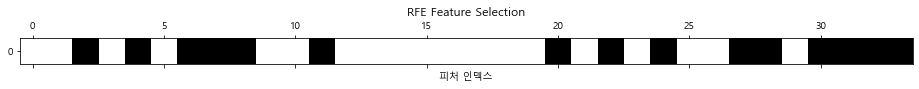

In [79]:
plt.matshow(rfe_support.reshape(1, -1), cmap = 'gray_r')
plt.title('RFE Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

## Stepwise

In [80]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist()):
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.Logit(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.Logit(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            pr_squared = sm.Logit(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).prsquared
            r_squared.append(pr_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,r_squared, marker='o')
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables, sv_per_step
    

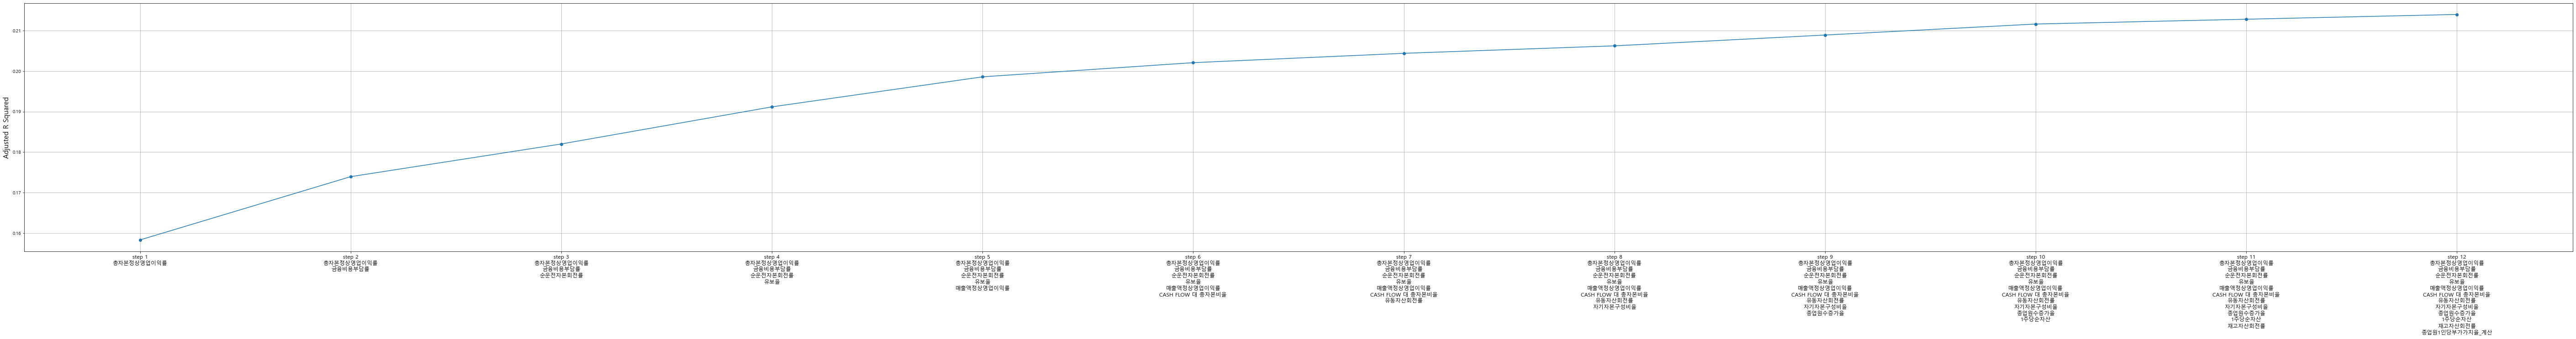

In [81]:
selected_variables, sv_per_step = stepwise_feature_selection(X_train, y_train)

In [82]:
sv_per_step[-1]

['총자본정상영업이익률',
 '금융비용부담률',
 '순운전자본회전률',
 '유보율',
 '매출액정상영업이익률',
 'CASH FLOW 대 총자본비율',
 '유동자산회전률',
 '자기자본구성비율',
 '종업원수증가율',
 '1주당순자산',
 '재고자산회전률',
 '종업원1인당부가가치율_계산']

In [83]:
print('Stepwise에서 선택된 피처 수: {0:1.0f}'.format(len(sv_per_step[-1])), '개')

Stepwise에서 선택된 피처 수: 12 개


In [84]:
df_stepwise = pd.DataFrame()
df_stepwise['feature'] = sv_per_step[-1]
df_stepwise

,feature
0,총자본정상영업이익률
1,금융비용부담률
2,순운전자본회전률
3,유보율
4,매출액정상영업이익률
5,CASH FLOW 대 총자본비율
6,유동자산회전률
7,자기자본구성비율
8,종업원수증가율
9,1주당순자산


## SelectKBest(Filter method)
#### 각 피처와 타겟 사이에 통계적 관계(상관계수)를 계산 후, 유의미하다고 판단되는 피처를 선택하는 방식. 피처 선택 후 따로 모델 적용이 필요가 없다. 카이제곱, information gain

In [85]:
from sklearn.feature_selection import f_regression, SelectKBest

skb = SelectKBest(score_func=f_regression, k=15)

X_train_selected = skb.fit_transform(X_train, y_train)
X_test_selected = skb.fit_transform(X_test, y_test)

X_train_selected.shape, X_test_selected.shape


((8920, 15), (3823, 15))

### 선택된 피처 확인 

In [86]:
feature_names = X_train.columns

# 선택된 feature mask처리
selected_mask = skb.get_support()

selected_features = feature_names[selected_mask]
unselected_features = feature_names[~selected_mask]

print('Selected features: ', selected_features)
print('Unselected features: ', unselected_features)


Selected features:  Index(['매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률',
       '자기자본순이익률', '금융비용부담률', '수지비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율',
       '총자본투자효율', '부가가치율', '자기자본구성비율', '타인자본회전률', '순운전자본회전률'],
      dtype='object')
Unselected features:  Index(['순이익증가율', '자기자본증가율', '종업원수증가율', '정상영업손익증가율', '사내유보 대 자기자본비율', '1주당매출액',
       '1주당순이익', '1주당 CASH FLOW', '1주당순자산', '유보율', '부채비율', 'CASH FLOW 대 매출액비율',
       '설비투자효율', '노동소득분배율', '종업원1인당부가가치율_계산', '유동자산회전률', '당좌자산회전률', '재고자산회전률',
       '총자본회전률'],
      dtype='object')


## chi2, MinMaxScaler()
### 카이제곱 검정은 데이터에 음수가 있으면 안됨

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

chi_time = time.time()

mm_X_train = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=15)
chi_selector.fit(mm_X_train, y_train)
print('SelectKBest chi 수행시간: {0:.1f}초'.format(time.time()-chi_time))

chi_scores = pd.DataFrame()
chi_scores['Feature'] = X_train.columns
chi_scores['Support'] = chi_selector.get_support()

chi_scores

SelectKBest chi 수행시간: 0.4초


,Feature,Support
0,순이익증가율,False
1,자기자본증가율,False
2,종업원수증가율,False
3,정상영업손익증가율,False
4,매출액정상영업이익률,False
5,매출액순이익률,False
6,총자본순이익률,True
7,총자본정상영업이익률,True
8,자기자본정상영업이익률,True
9,자기자본순이익률,False


In [88]:
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:, chi_support].columns.tolist()
chi_feature

['총자본순이익률',
 '총자본정상영업이익률',
 '자기자본정상영업이익률',
 '수지비율',
 '1주당매출액',
 '1주당순자산',
 '유보율',
 '부채비율',
 'CASH FLOW 대 총자본비율',
 '유동자산회전률',
 '당좌자산회전률',
 '재고자산회전률',
 '총자본회전률',
 '타인자본회전률',
 '순운전자본회전률']

([<matplotlib.axis.YTick at 0x28eb1927e20>], [Text(0, 0, '')])

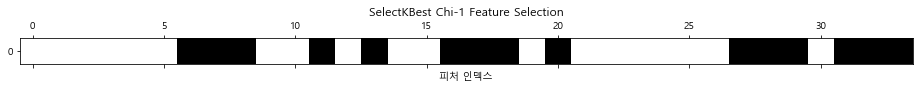

In [89]:
plt.matshow(chi_support.reshape(1, -1), cmap = 'gray_r')
plt.title('SelectKBest Chi-1 Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

### SelectFromModel(Embedded method)
#### supervised 머신러닝 모델을 사용해서 피처 중요도를 평가 후 중요도가 높은 피처들만 선택하는 방식. 한번에 모든 피처들을 고려하기 때문에 상호작용 부분을 반영할 수 있다. LogisticRegression, DecisionTree, RandomForestClassifier, LGBMClassifier와 같은 모델에 적용이 필요하다.

### LogisticRegression

In [90]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sfm_lr_time = time.time()
sfm_lr = SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear'), max_features=15).fit(X_train, y_train)
sfm_lr.fit(X_train, y_train)
print('SelectFromModel LogisticRegression 수행시간: {0:.1f}초'.format(time.time()-sfm_lr_time))

sfm_lr_scores = pd.DataFrame()
sfm_lr_scores['Feature'] = X_train.columns
sfm_lr_scores['Support'] = sfm_lr.get_support()

sfm_lr_scores

SelectFromModel LogisticRegression 수행시간: 1.1초


,Feature,Support
0,순이익증가율,False
1,자기자본증가율,False
2,종업원수증가율,True
3,정상영업손익증가율,False
4,매출액정상영업이익률,True
5,매출액순이익률,False
6,총자본순이익률,True
7,총자본정상영업이익률,True
8,자기자본정상영업이익률,False
9,자기자본순이익률,False


In [91]:
sfm_lr_support = sfm_lr.get_support()
sfm_lr_feature = X_train.loc[:,sfm_lr_support].columns.tolist()
sfm_lr_feature

['종업원수증가율',
 '매출액정상영업이익률',
 '총자본순이익률',
 '총자본정상영업이익률',
 '금융비용부담률',
 '수지비율',
 'CASH FLOW 대 총자본비율',
 'CASH FLOW 대 매출액비율',
 '총자본투자효율',
 '유동자산회전률',
 '당좌자산회전률',
 '자기자본구성비율',
 '총자본회전률',
 '타인자본회전률',
 '순운전자본회전률']

([<matplotlib.axis.YTick at 0x28eb2c70220>], [Text(0, 0, '')])

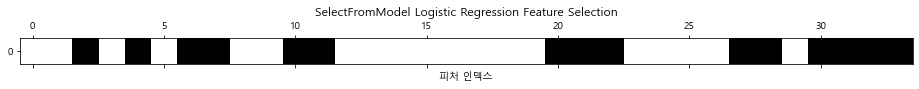

In [92]:
plt.matshow(sfm_lr_support.reshape(1, -1), cmap = 'gray_r')
plt.title('SelectFromModel Logistic Regression Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

### RandomForestClassifier

In [93]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

sfm_rf_time = time.time()
sfm_rf = SelectFromModel(RandomForestClassifier(n_estimators=100, max_features=15))
sfm_rf.fit(X_train, y_train)
print('SelectFromModel RandomForest 수행시간: {0:.1f}초'.format(time.time()-sfm_rf_time))

sfm_rf_scores = pd.DataFrame()
sfm_rf_scores['Feature'] = X_train.columns
sfm_rf_scores['Support'] = sfm_rf.get_support()

sfm_rf_scores

SelectFromModel RandomForest 수행시간: 26.8초


,Feature,Support
0,순이익증가율,True
1,자기자본증가율,False
2,종업원수증가율,True
3,정상영업손익증가율,True
4,매출액정상영업이익률,True
5,매출액순이익률,False
6,총자본순이익률,False
7,총자본정상영업이익률,True
8,자기자본정상영업이익률,True
9,자기자본순이익률,True


In [94]:
sfm_rf_support = sfm_rf.get_support()
sfm_rf_feature = X_train.loc[:, sfm_rf_support].columns.tolist()
sfm_rf_feature

['순이익증가율',
 '종업원수증가율',
 '정상영업손익증가율',
 '매출액정상영업이익률',
 '총자본정상영업이익률',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '금융비용부담률']

([<matplotlib.axis.YTick at 0x28eb6cf8160>], [Text(0, 0, '')])

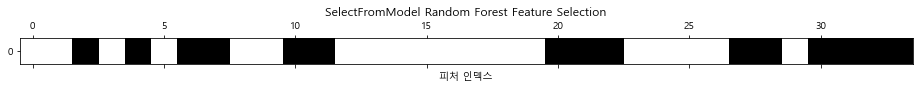

In [95]:
plt.matshow(sfm_lr_support.reshape(1, -1), cmap = 'gray_r')
plt.title('SelectFromModel Random Forest Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

In [96]:
features_df = pd.DataFrame()
features_df['Feature'] = X_train.columns
features_df['Lasso'] = ''
features_df['Stepwise'] = ''
features_df['RFE'] = rfe_scores['Support']
features_df['Chi-2'] = chi_scores['Support']
features_df['LR'] = sfm_lr_scores['Support']
features_df['RF'] = sfm_rf_scores['Support']

count = features_df[['Lasso', 'Stepwise', 'RFE', 'Chi-2', 'LR', 'RF']].sum(axis=1)
features_df['Total'] = count
features_df

,Feature,Lasso,Stepwise,RFE,Chi-2,LR,RF,Total
0,순이익증가율,,,False,False,False,True,1
1,자기자본증가율,,,False,False,False,False,0
2,종업원수증가율,,,True,False,True,True,3
3,정상영업손익증가율,,,False,False,False,True,1
4,매출액정상영업이익률,,,True,False,True,True,3
5,매출액순이익률,,,False,False,False,False,0
6,총자본순이익률,,,True,True,True,False,3
7,총자본정상영업이익률,,,True,True,True,True,4
8,자기자본정상영업이익률,,,True,True,False,True,3
9,자기자본순이익률,,,False,False,False,True,1


In [97]:
df_lasso_bool = pd.DataFrame()
df_lasso_bool['Feature'] = features_df['Feature']
df_lasso_bool['Lasso'] = ''
for i in df_lasso_bool.index:
    if df_lasso_bool.loc[i, 'Feature'] in lasso_features:
        df_lasso_bool.loc[i, 'Lasso'] = True
    else:
        df_lasso_bool.loc[i, 'Lasso'] = False
df_lasso_bool


,Feature,Lasso
0,순이익증가율,True
1,자기자본증가율,True
2,종업원수증가율,True
3,정상영업손익증가율,True
4,매출액정상영업이익률,True
5,매출액순이익률,True
6,총자본순이익률,True
7,총자본정상영업이익률,False
8,자기자본정상영업이익률,True
9,자기자본순이익률,True


In [98]:
df_stepwise_bool = pd.DataFrame()
df_stepwise_bool['Feature'] = features_df['Feature']
df_stepwise_bool['Stepwise'] = ''
for i in df_stepwise_bool.index:
    if df_stepwise_bool.loc[i, 'Feature'] in sv_per_step[-1]:
        df_stepwise_bool.loc[i, 'Stepwise'] = True
    else:
        df_stepwise_bool.loc[i, 'Stepwise'] = False
df_stepwise_bool

,Feature,Stepwise
0,순이익증가율,False
1,자기자본증가율,False
2,종업원수증가율,True
3,정상영업손익증가율,False
4,매출액정상영업이익률,True
5,매출액순이익률,False
6,총자본순이익률,False
7,총자본정상영업이익률,True
8,자기자본정상영업이익률,False
9,자기자본순이익률,False


### 모든 피처셀렉션 결과 병합 데이터프레임

In [99]:
features_df['Lasso'] = df_lasso_bool['Lasso']
features_df['Stepwise'] = df_stepwise_bool['Stepwise']
count = features_df[['Lasso', 'Stepwise','RFE', 'Chi-2', 'LR', 'RF']].sum(axis=1)
features_df['Total'] = count
features_df['Total'] = features_df['Total']
features_df['Total'] = features_df['Total'].astype(int)
features_df.sort_values('Total', ascending=False).reset_index(drop=True)

,Feature,Lasso,Stepwise,RFE,Chi-2,LR,RF,Total
0,종업원수증가율,True,True,True,False,True,True,5
1,매출액정상영업이익률,True,True,True,False,True,True,5
2,총자본정상영업이익률,False,True,True,True,True,True,5
3,순운전자본회전률,False,True,True,True,True,False,4
4,총자본순이익률,True,False,True,True,True,False,4
5,자기자본정상영업이익률,True,False,True,True,False,True,4
6,자기자본구성비율,True,True,True,False,True,False,4
7,수지비율,True,False,True,True,True,False,4
8,유동자산회전률,False,True,True,True,True,False,4
9,CASH FLOW 대 총자본비율,False,True,True,True,True,False,4


In [100]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Feature   34 non-null     object
 1   Lasso     34 non-null     object
 2   Stepwise  34 non-null     object
 3   RFE       34 non-null     bool  
 4   Chi-2     34 non-null     bool  
 5   LR        34 non-null     bool  
 6   RF        34 non-null     bool  
 7   Total     34 non-null     int32 
dtypes: bool(4), int32(1), object(3)
memory usage: 1.2+ KB


In [101]:
features_df.to_csv('../data/선택된피처/unscaled_features.csv', encoding='CP949')